In [52]:
import xarray as xr
import pandas as pd
import numpy as np

ds = xr.open_dataset('ERA5_Data\ERA5_Reanalysis.nc')

extracted_ds = ds[['u10', 'v10', 'sp', 't2m']]

df = pd.DataFrame()
df['timestamp'] = ds.time
df['u10'] = ds.u10.to_numpy().flatten()[~np.isnan(ds.u10.to_numpy().flatten())]
df['v10'] = ds.v10.to_numpy().flatten()[~np.isnan(ds.v10.to_numpy().flatten())]
df['sp'] = ds.sp.to_numpy().flatten()[~np.isnan(ds.sp.to_numpy().flatten())]
df['t2m'] = ds.t2m.to_numpy().flatten()[~np.isnan(ds.t2m.to_numpy().flatten())]
df['ws'] = np.sqrt(df['u10']**2 + df['v10']**2)
df = df.set_index('timestamp')


<Axes: xlabel='timestamp'>

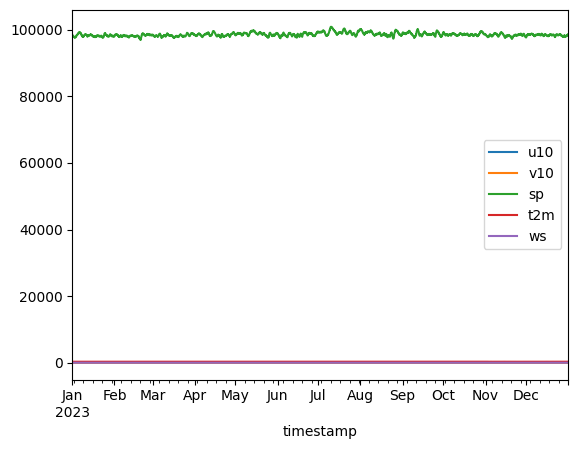

In [53]:
df.plot()

In [54]:
df.to_csv('ERA5_Data\ERA5_Reanalysis.csv')